# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import quickda as qda 
sns.set()

In [2]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('Marketing_data.csv')
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Let's see who made one off purchase of $40761!
df[df['PURCHASES'] == df['PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
df[df['CASH_ADVANCE'] == df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

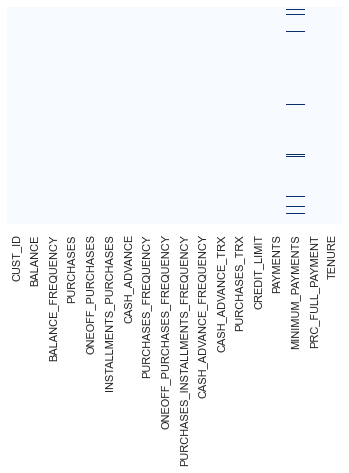

In [7]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df.loc[df.MINIMUM_PAYMENTS.isnull() == True,'MINIMUM_PAYMENTS'] = df.MINIMUM_PAYMENTS.mean()  

In [10]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df.loc[df.CREDIT_LIMIT.isnull() == True,'CREDIT_LIMIT'] = df.CREDIT_LIMIT.mean()

<AxesSubplot:>

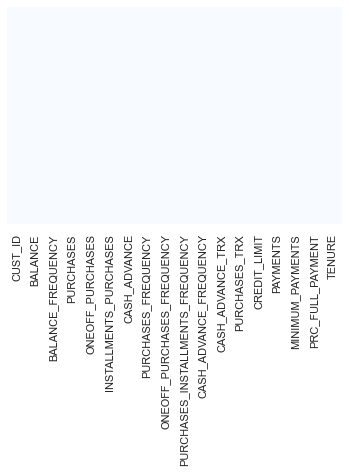

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [12]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [13]:
# Let's drop Customer ID since it has no meaning here 
df.drop('CUST_ID',axis=1,inplace=True)

In [14]:
n = len(df.columns)
n

17

In [15]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

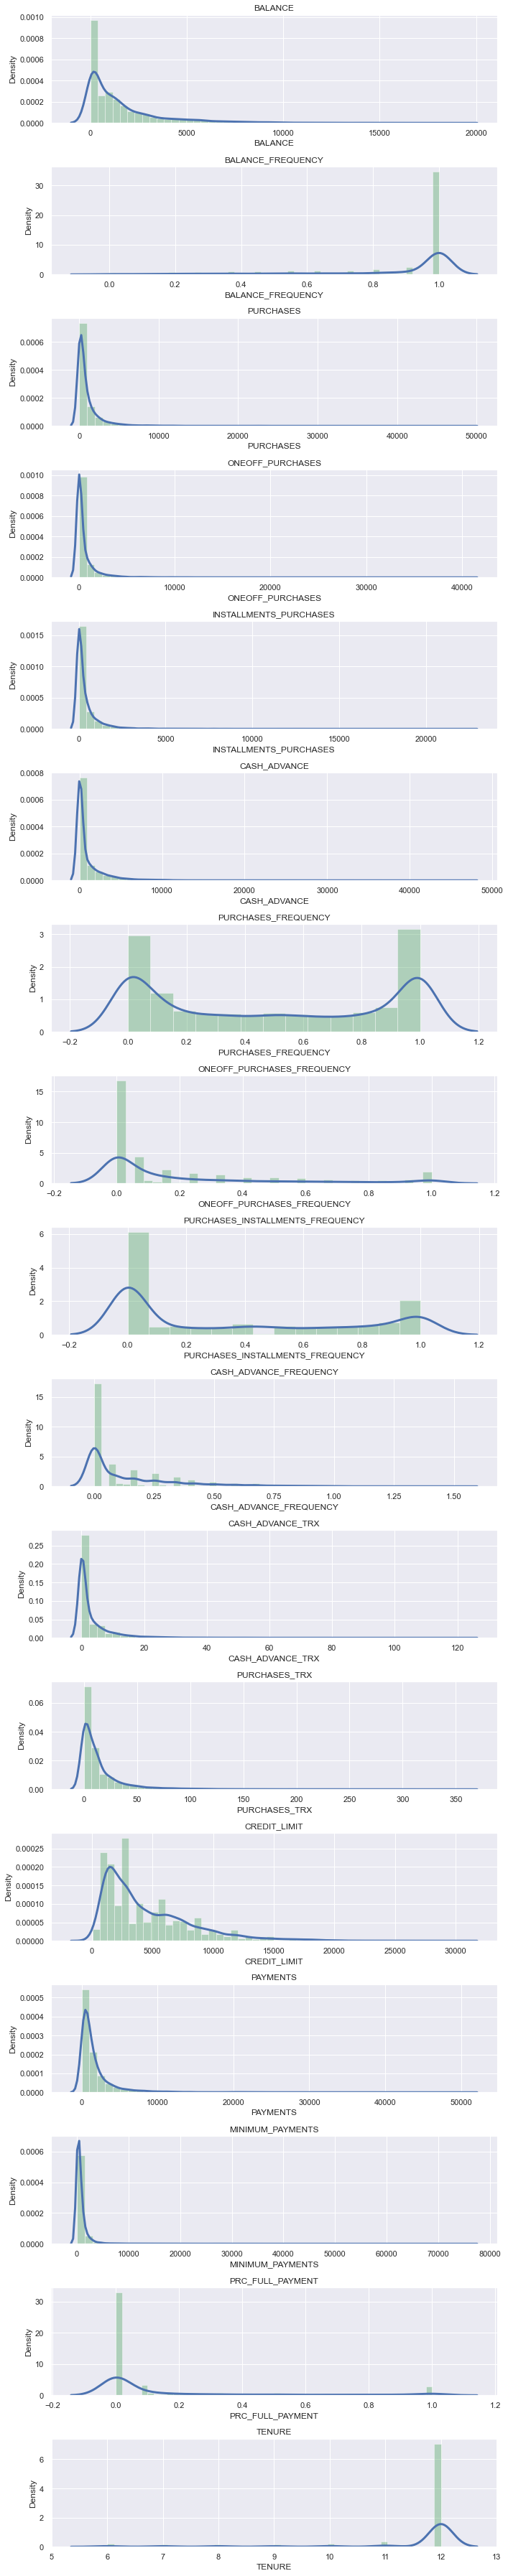

In [16]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(n):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'b','lw':3,'label':'KDE'}, hist_kws = {'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

In [17]:
correlations = df.corr()

<AxesSubplot:>

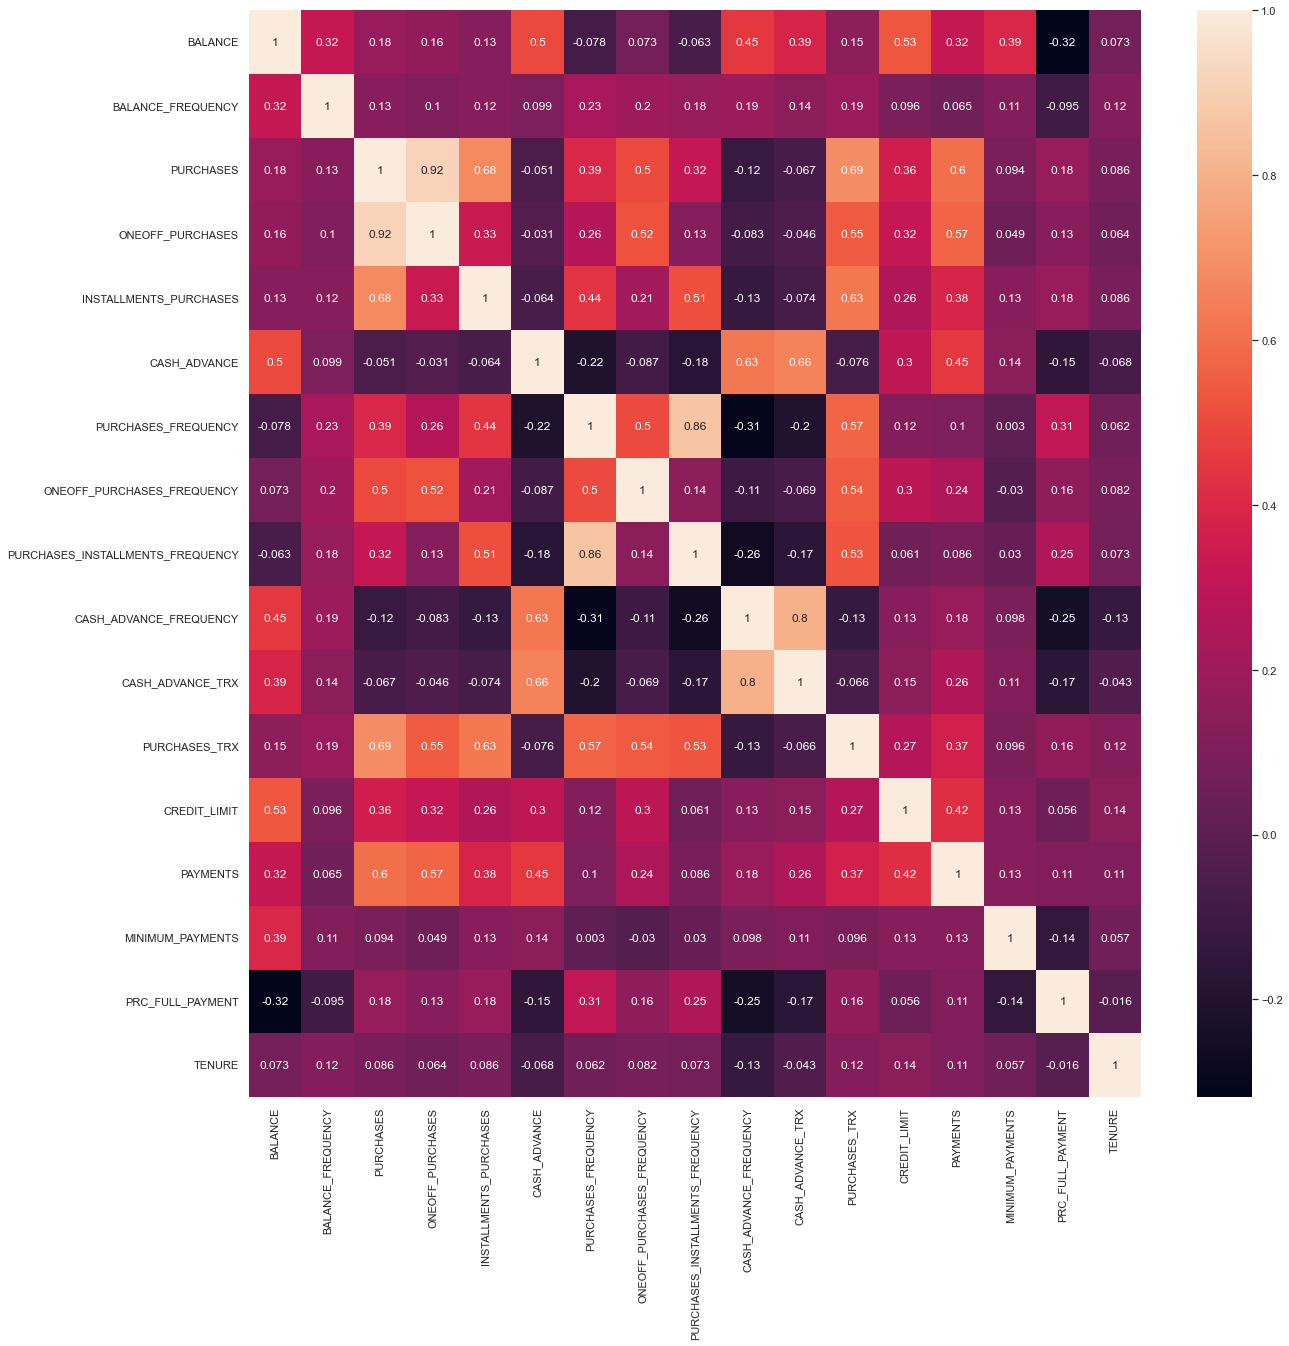

In [18]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations,annot=True)

In [19]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [71]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [72]:
df_scaled.shape

(8950, 17)

In [73]:
score1 = []
rangev = range(1,20)
for i in rangev:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    score1.append(kmeans.inertia_)



Text(0, 0.5, 'WCSS')

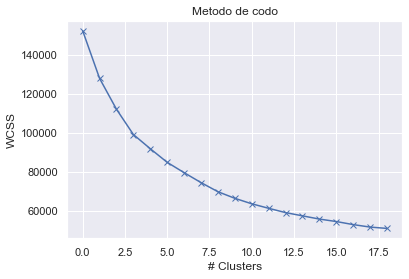

In [74]:
plt.plot(score1,'bx-')
plt.title('Metodo de codo')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

In [75]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [76]:
labels

array([1, 6, 3, ..., 0, 0, 0])

In [77]:
kmeans.cluster_centers_.shape

(8, 17)

In [78]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])

In [79]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
1,0.008141,0.401298,-0.343385,-0.223510,-0.401190,-0.102737,-0.813433,-0.333500,-0.758290,0.087766,-0.039731,-0.465760,-0.300170,-0.246904,-0.044027,-0.452255,0.271508
2,-0.377186,0.331565,-0.043235,-0.230902,0.321814,-0.367692,0.972664,-0.343511,1.159949,-0.476461,-0.362248,0.165946,-0.275917,-0.225431,-0.097406,0.303198,0.252737
3,0.141823,0.431135,0.976178,0.922535,0.613272,-0.306847,1.099990,1.876452,0.549684,-0.407155,-0.316761,1.225403,0.720616,0.414381,-0.047411,0.471883,0.307390
4,-0.701894,-2.135494,-0.307095,-0.230581,-0.302387,-0.322957,-0.547410,-0.428870,-0.441051,-0.522120,-0.376732,-0.416657,-0.172121,-0.201648,-0.257506,0.295702,0.201907
5,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409
6,1.653909,0.392268,-0.200820,-0.145718,-0.207210,2.008005,-0.449397,-0.180820,-0.401410,1.931518,1.942354,-0.234680,1.011280,0.846570,0.390190,-0.388390,0.067876
7,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386


In [80]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns= df.columns)
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
1,1581.419788,0.972335,269.557578,221.456222,48.276597,763.427169,0.163880,0.102968,0.063074,0.152707,2.977691,3.132790,3402.307602,1018.380038,761.603546,0.021438,11.880666
2,779.394705,0.955815,910.833166,209.187194,702.080447,207.803511,0.880728,0.099982,0.825431,0.039799,0.776751,18.834630,3490.549709,1080.541781,637.206839,0.242395,11.855545
3,1859.667529,0.979403,3088.823827,2123.657005,965.642258,335.398256,0.931830,0.762240,0.582896,0.053668,1.087163,45.168780,7116.344907,2932.735469,753.717200,0.291732,11.928685
4,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
5,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,0.000000,11.916667
6,5006.947289,0.970195,574.150317,350.575119,223.690340,5189.752067,0.309986,0.148515,0.204907,0.521661,16.503964,8.876557,8173.900957,4183.882334,1773.527879,0.040117,11.608154
7,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459


In [81]:
labels.shape

(8950,)

In [82]:
labels.max()

7

In [83]:
labels.min()

0

In [84]:
# concatenate the clusters labels to our original dataframe

df_cluster = pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


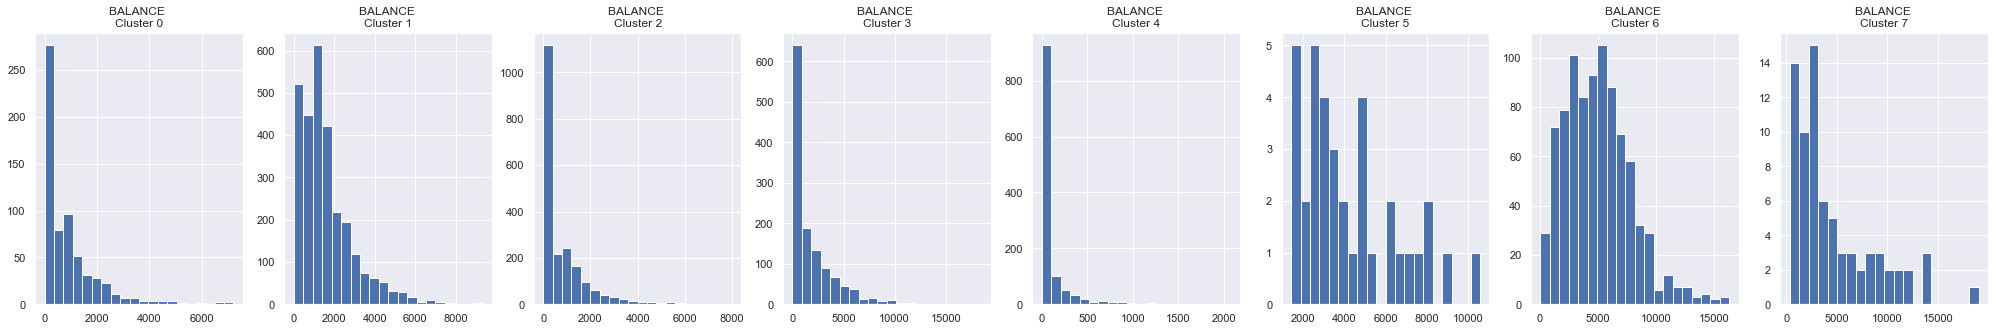

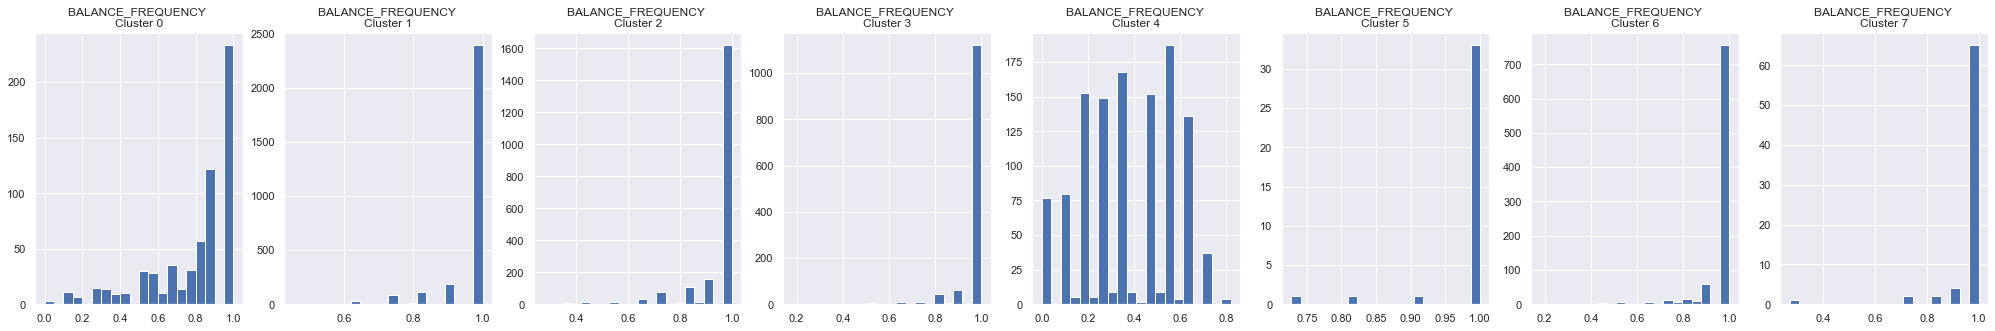

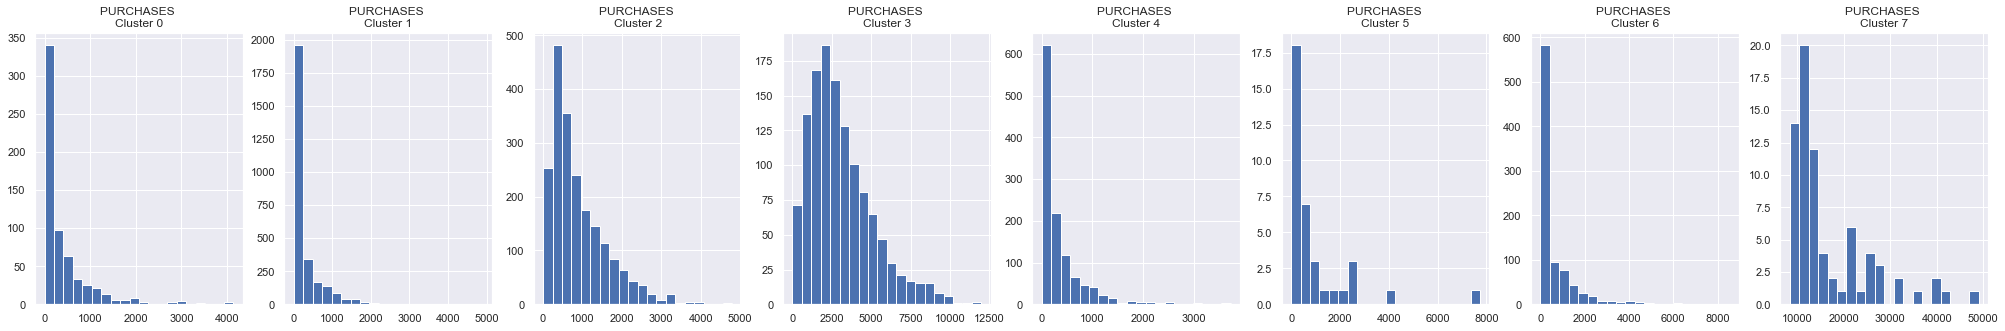

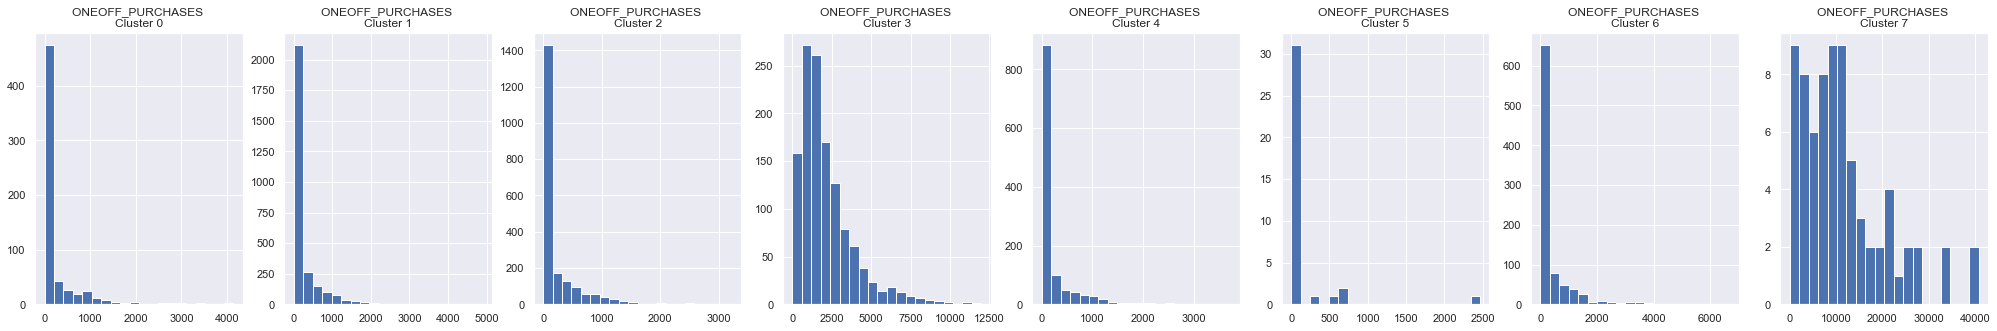

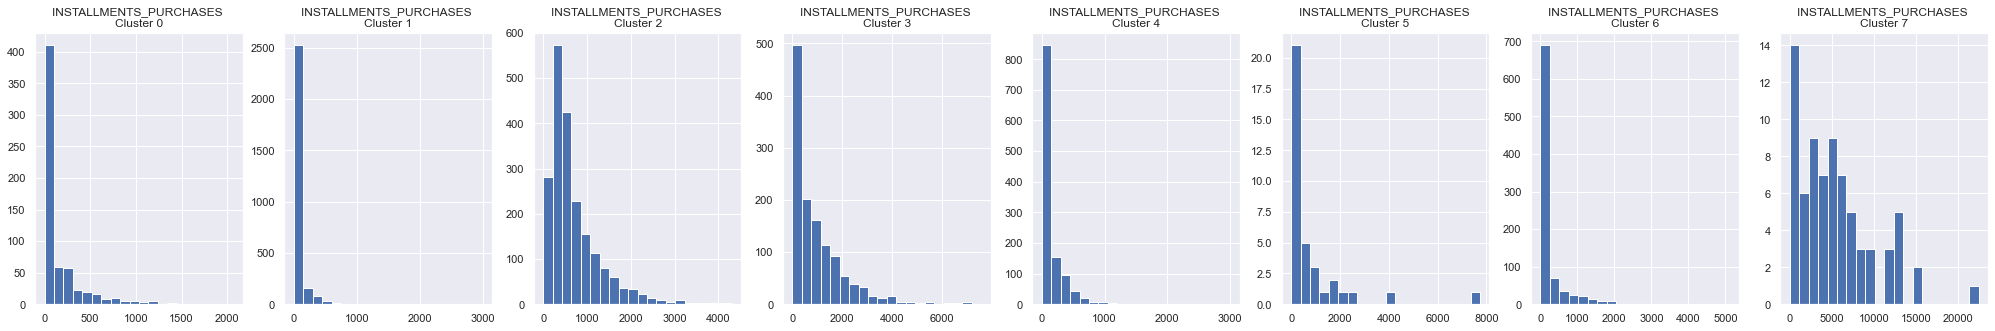

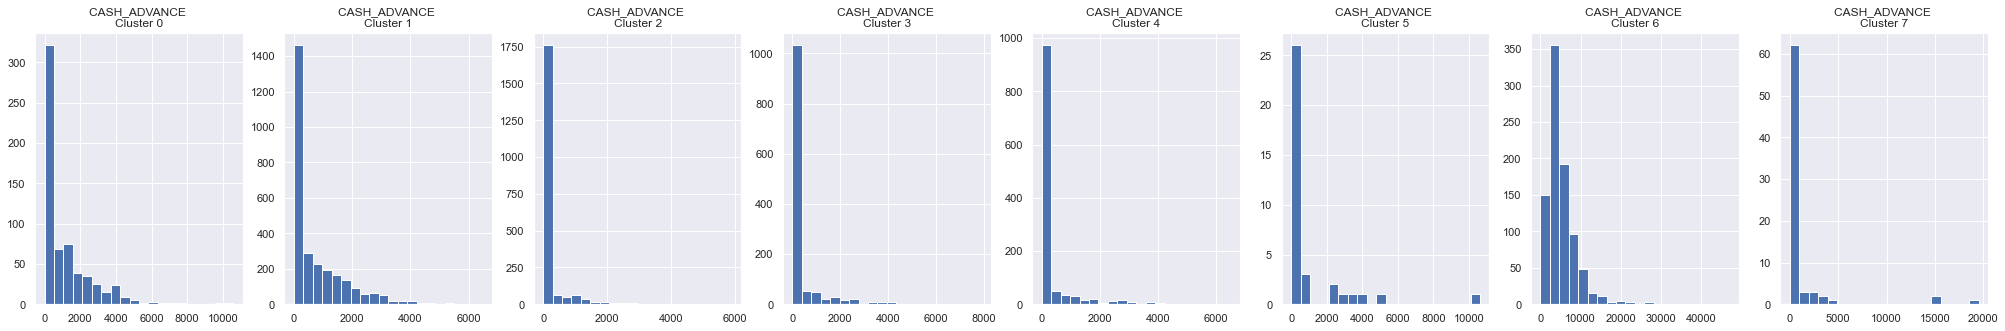

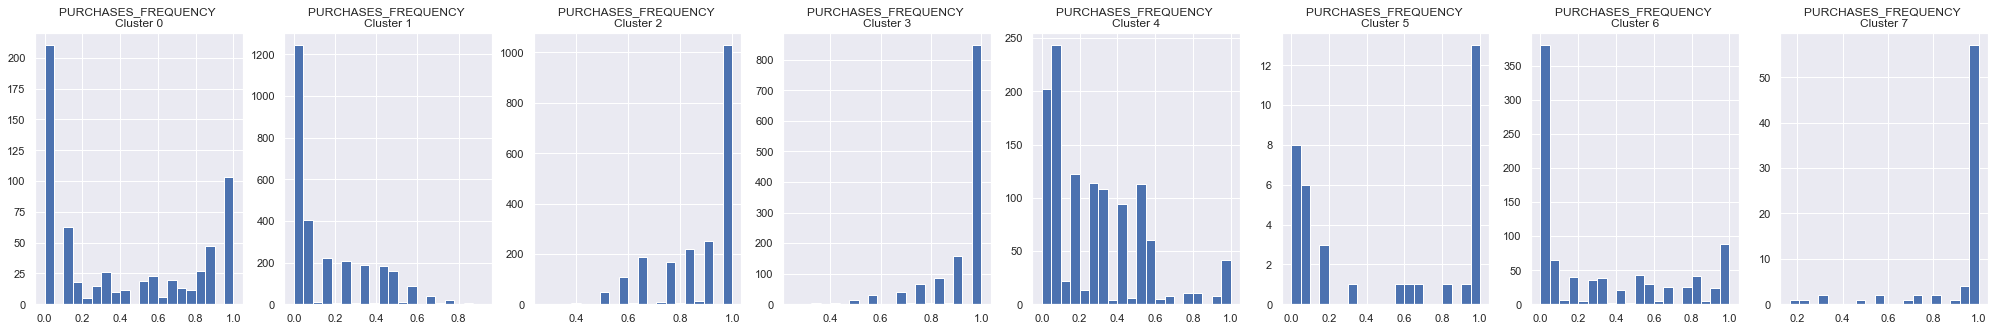

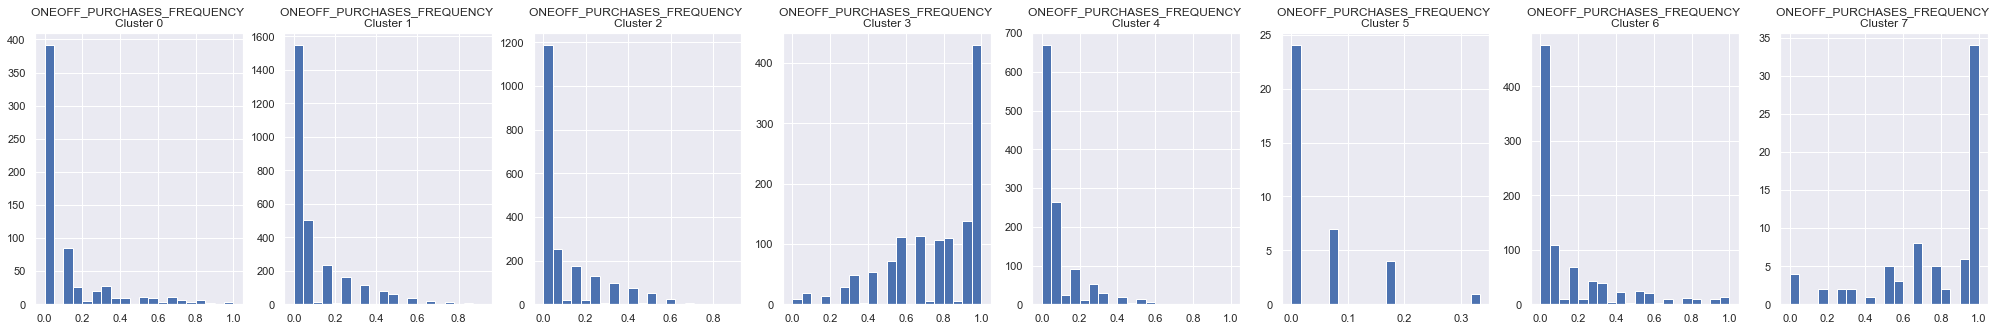

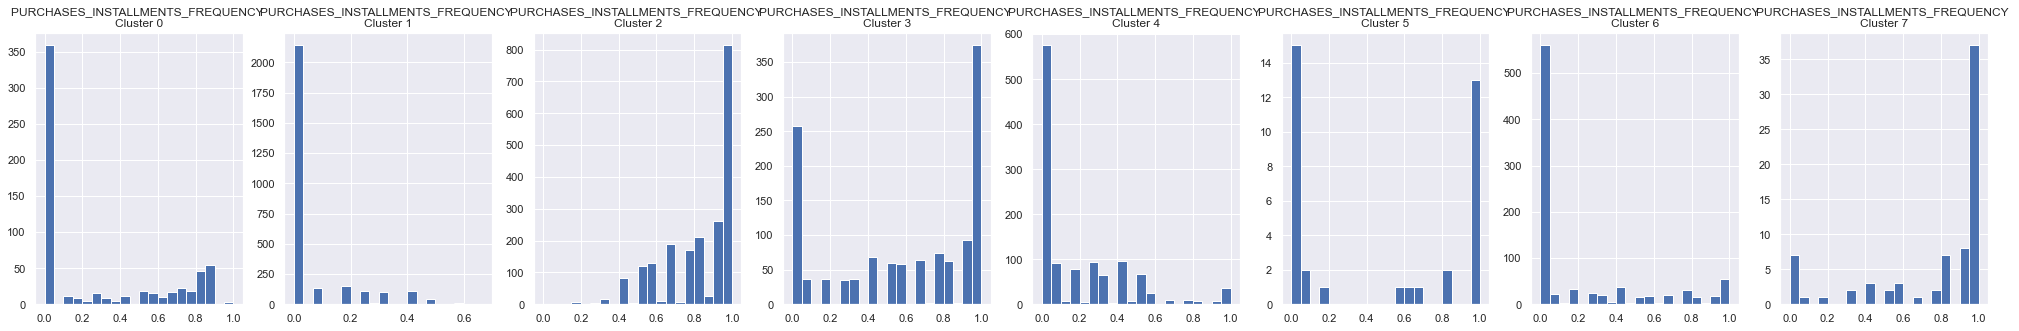

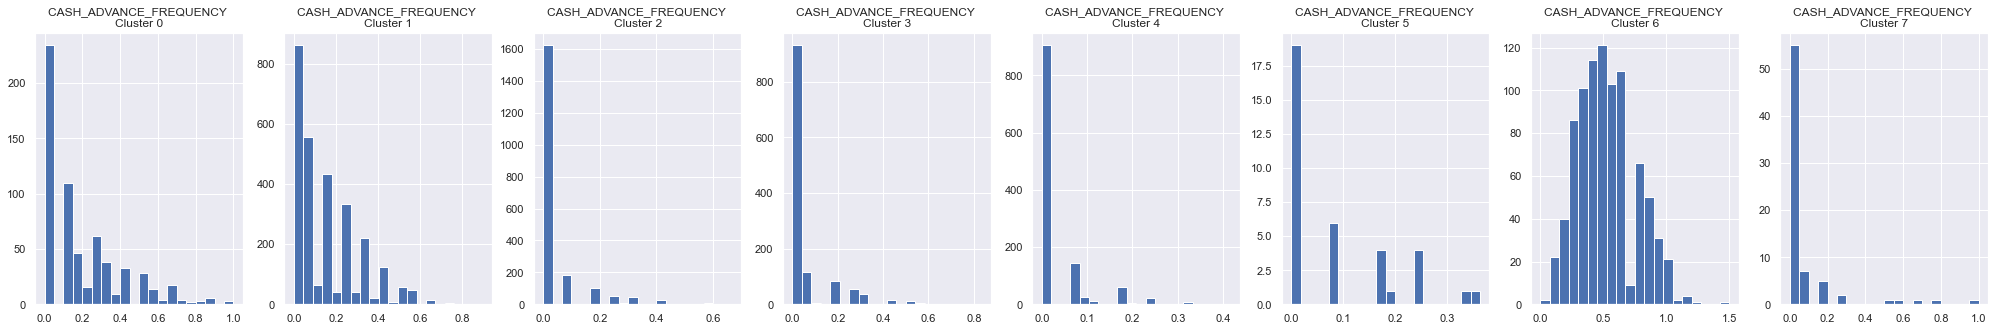

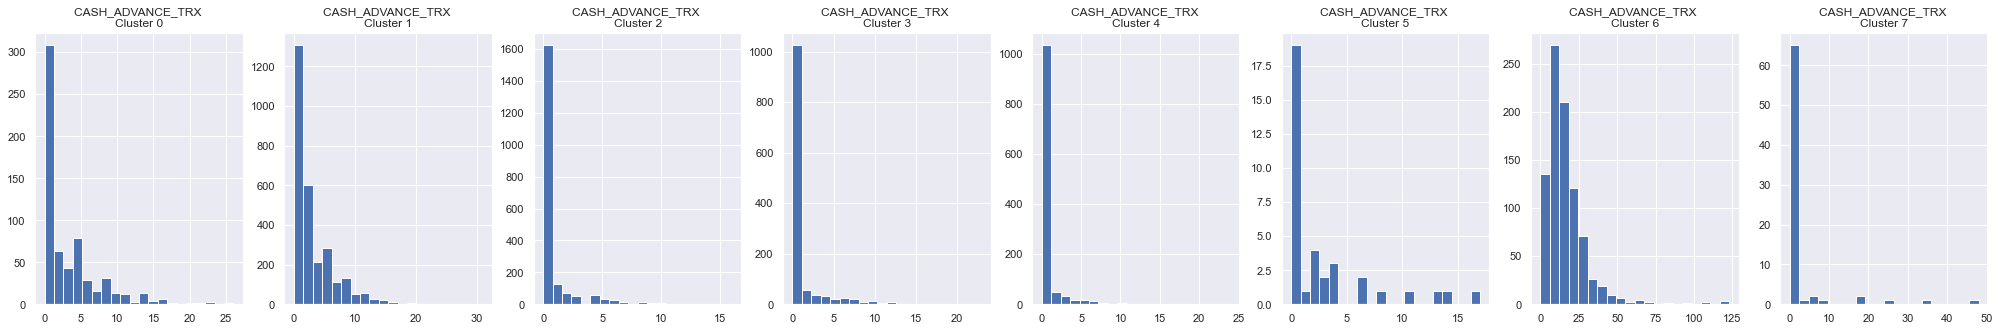

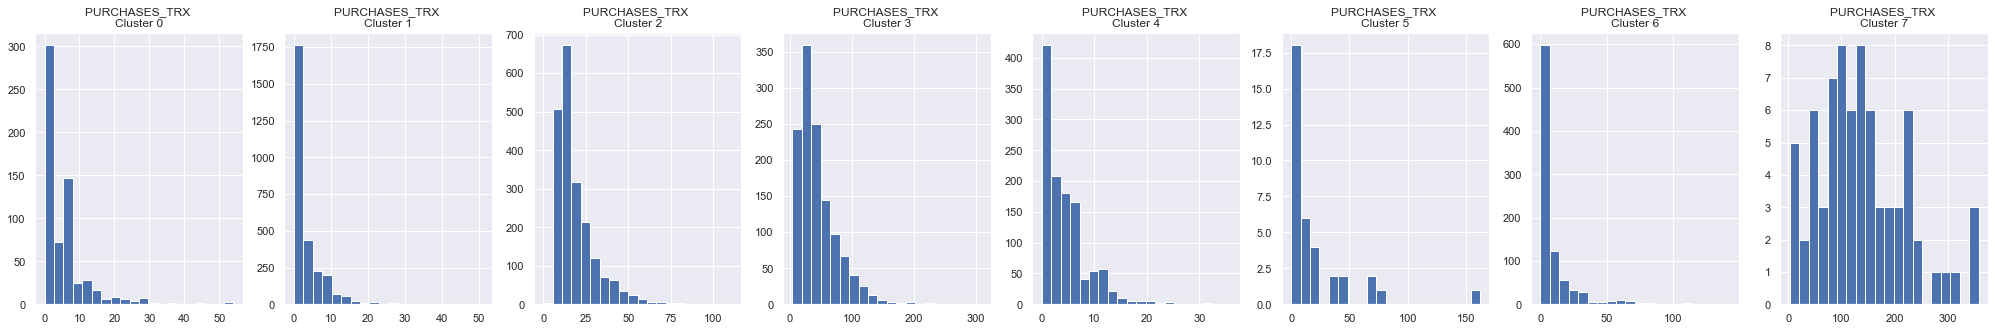

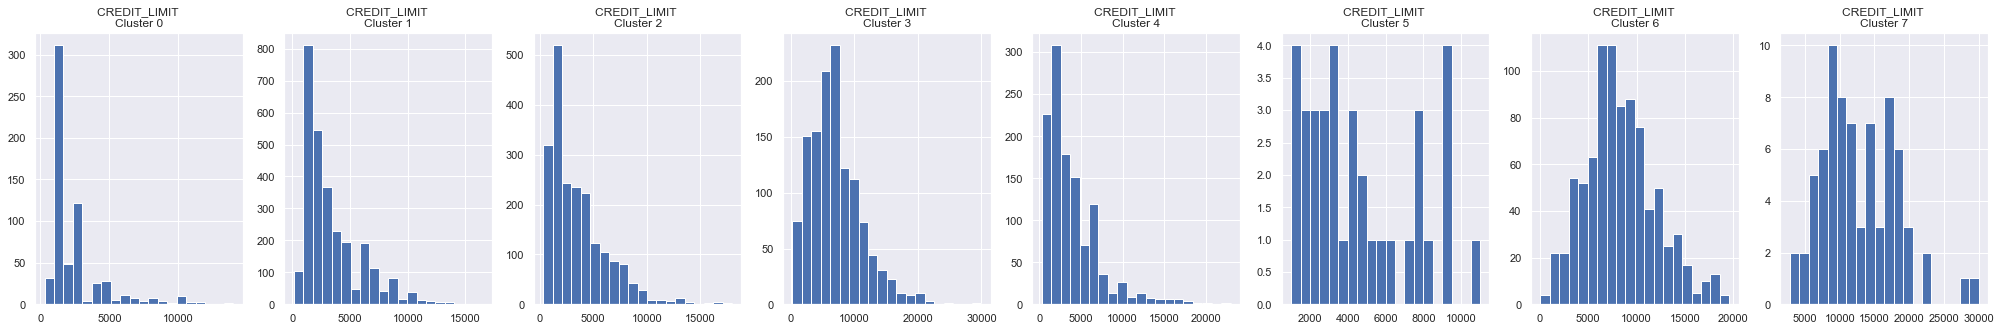

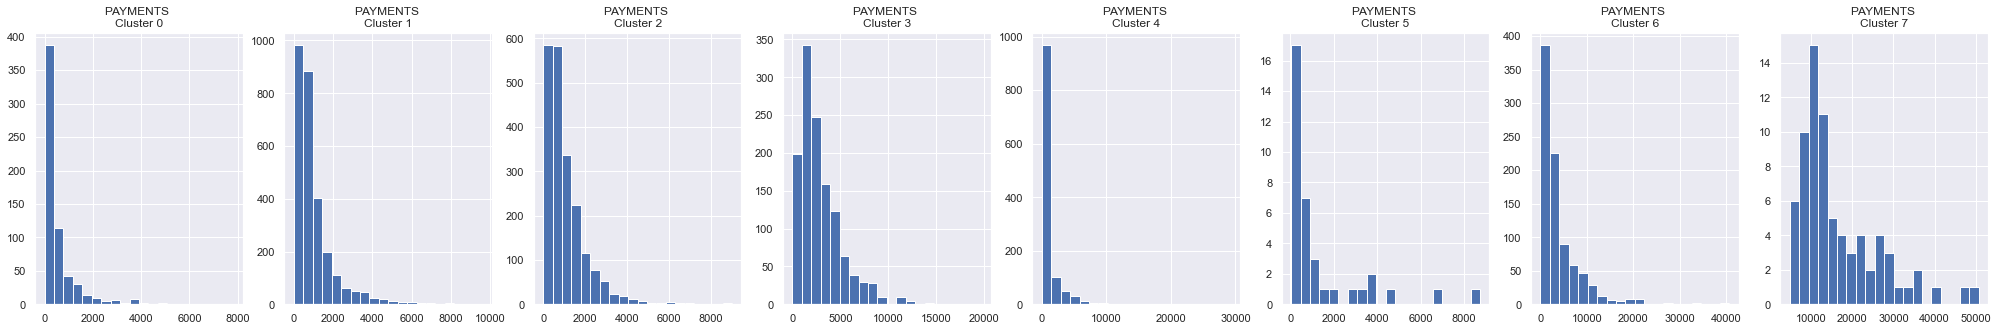

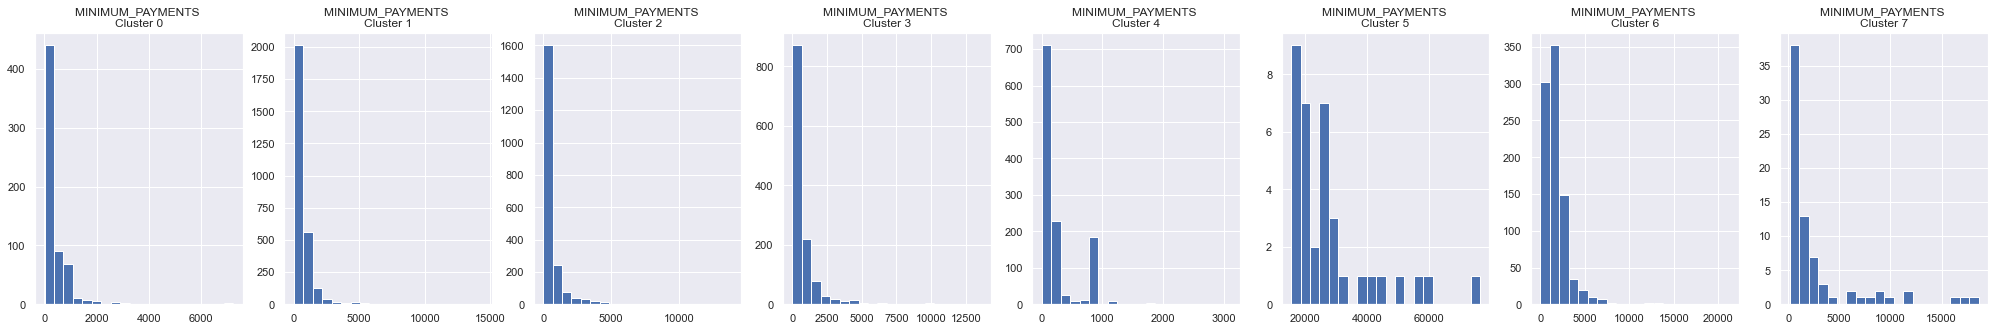

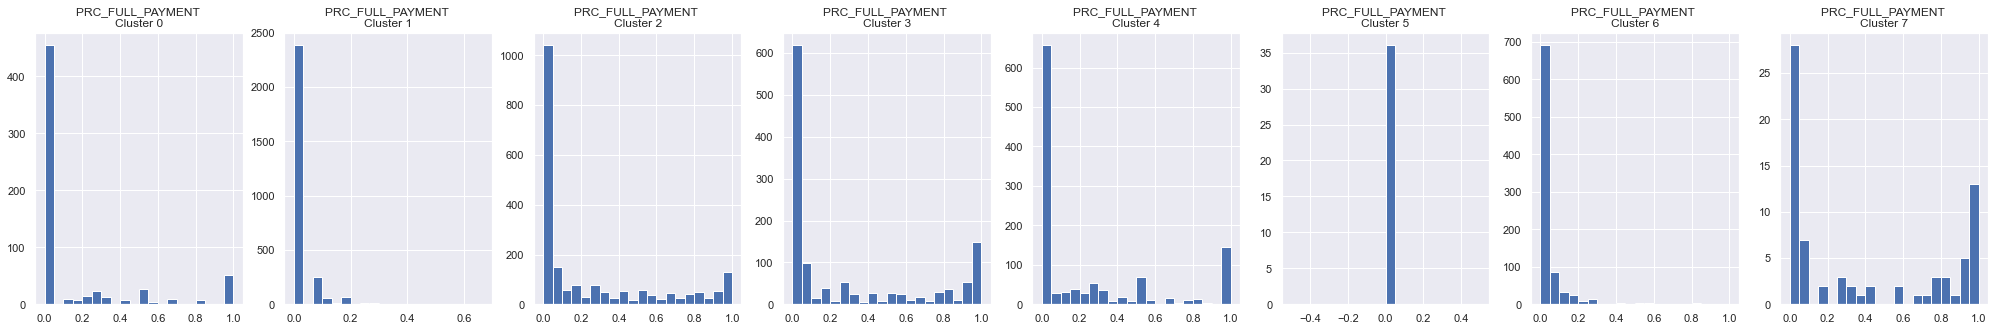

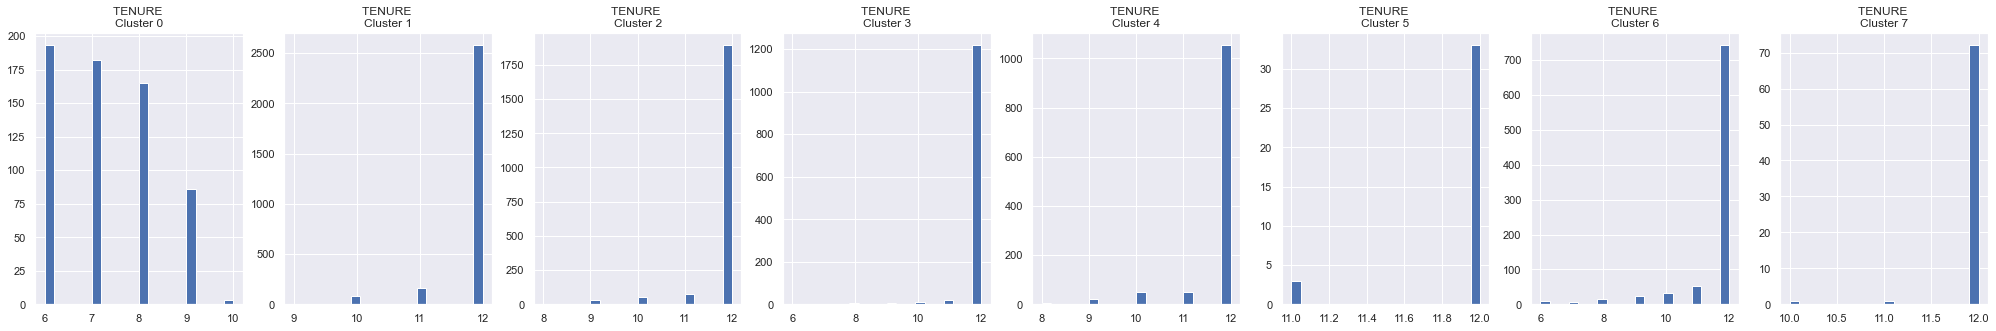

In [85]:
# Plot the histogram of various clusters
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i,j))

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [86]:
# Obtain the principal components 
pca  = PCA(n_components=2)
principa_comp = pca.fit_transform(df_scaled)
principa_comp

array([[-1.68222806, -1.07644991],
       [-1.13835224,  2.50650065],
       [ 0.9696884 , -0.38352078],
       ...,
       [-0.92619913, -1.81079155],
       [-2.3365489 , -0.65796997],
       [-0.55642315, -0.40046065]])

In [87]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principa_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682228,-1.076450
1,-1.138352,2.506501
2,0.969688,-0.383521
3,-0.873607,0.043157
4,-1.599447,-0.688579


In [88]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682228,-1.076450,1
1,-1.138352,2.506501,6
2,0.969688,-0.383521,3
3,-0.873607,0.043157,1
4,-1.599447,-0.688579,1


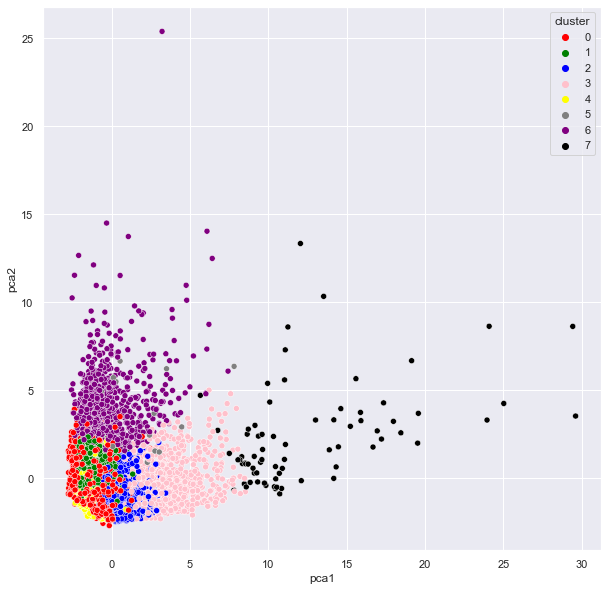

In [89]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [90]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [91]:
input_df = Input(shape = (17,))

x = Dense(7,activation='relu')(input_df)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df,decoded)

# Encoder
encoder = Model(input_df,encoded)

autoencoder.compile(optimizer = 'adam',loss='mean_squared_error')

In [92]:
df_scaled.shape

(8950, 17)

In [93]:
autoencoder.fit(df_scaled,df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 1s 7ms/step - loss: 0.5584
Epoch 2/25
70/70 [==============================] - 0s 3ms/step - loss: 0.3140
Epoch 3/25
70/70 [==============================] - 0s 3ms/step - loss: 0.2466
Epoch 4/25
70/70 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 5/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1835
Epoch 6/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 7/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 8/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1278
Epoch 9/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1156
Epoch 10/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1087
Epoch 11/25
70/70 [==============================] - 0s 3ms/step - loss: 0.0951
Epoch 12/25
70/70 [==============================] - 0s 3ms/step - loss: 0.0900
Epoch 13/25
70/70 [==============================

In [94]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [95]:
pred = encoder.predict(df_scaled)

In [96]:
pred.shape

(8950, 10)

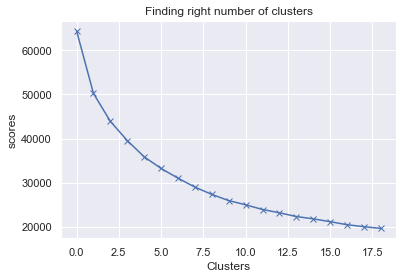

In [97]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

C:\Users\chris\AppData\Local\Temp/ipykernel_25452/3682813800.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score1, 'bx-', color = 'r')
C:\Users\chris\AppData\Local\Temp/ipykernel_25452/3682813800.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


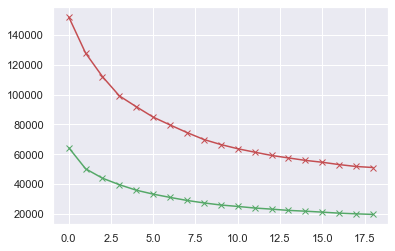

In [100]:
plt.plot(score1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [101]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [106]:
pca  = PCA(n_components=2)
principa_comp = pca.fit_transform(pred)
principa_comp

array([[-1.1605797 , -0.56361336],
       [ 1.8277282 , -1.5420331 ],
       [-0.09088317,  1.2014681 ],
       ...,
       [-0.52938384, -0.54796565],
       [ 0.5380865 , -1.0595764 ],
       [ 1.2343136 , -0.4568399 ]], dtype=float32)

In [107]:
# Create a dataframe with the three components
pca_df = pd.DataFrame(data=principa_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.160580,-0.563613
1,1.827728,-1.542033
2,-0.090883,1.201468
3,0.318019,-0.878665
4,-1.102378,-0.384290


In [108]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.160580,-0.563613,0
1,1.827728,-1.542033,3
2,-0.090883,1.201468,0
3,0.318019,-0.878665,3
4,-1.102378,-0.384290,0


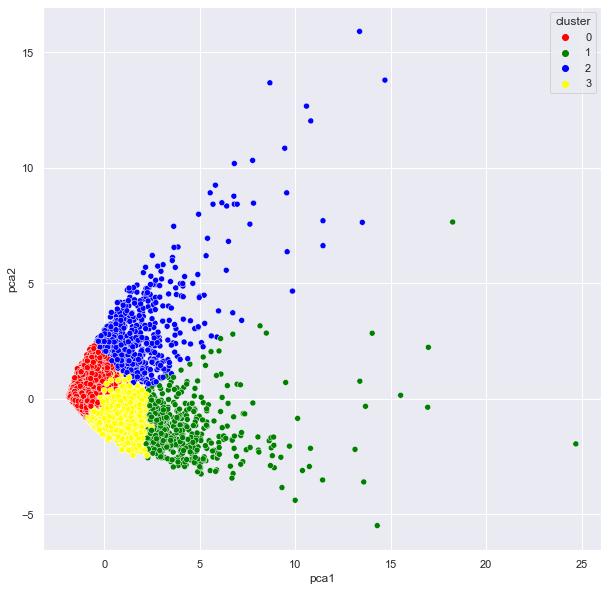

In [109]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette =['red','green','blue','yellow'])
plt.show()

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS